### The CART Algorithm

In [1]:
from DecisionTree import *

In [ ]:
# read data
train, test, data_train, data_test, child_to_index_train, child_to_index_test = get_train_test()

In [ ]:
partitions = get_data_partitions(data_train)

In [2]:
def gini_index(data):
    LABEL_IDX = -1
    mappings = {'asd': 1, 'non-asd':0, 0:0, 1:1}
    unique, counts = np.unique(data[:, LABEL_IDX], return_counts=True)
    
    total = sum(counts)
    gini_score = 1 - np.sum((counts / total)**2) # 1 - sum(p_i)^2
    
    return gini_score

def weighted_gini_score(a, b):
    n = a.shape[0] + b.shape[0]
    
    p_a, p_b = a.shape[0] / n, b.shape[0] / n
    
    gini_a, gini_b = gini_index(a), gini_index(b)
    
    return p_a*gini_a + p_b*gini_b
    
def lowest_gini_split(data, partitions):
    
    lowest = np.inf
    winning_score = None
    winning_question = None
    
    for question, values in partitions.items():
        for score in values:
            a,b = partition_data(data, question, score)
            
            gini_score = weighted_gini_score(a,b)
            
            if(gini_score < lowest):
                lowest = gini_score
                winning_score = score
                winning_question = question
                
            
    return winning_question, winning_score, lowest
    

In [ ]:
question, split, gini = lowest_gini_split(data_train, partitions)

In [ ]:
a,b = partition_data(data_train, question, split)
a,b

In [3]:
def cart_algorithm(data, features=None):
    
    if(is_single_class(data)):
        return classify(data)
    
    
    partitions = get_data_partitions(data)
    question, value, gini = lowest_gini_split(data, partitions)
    a,b = partition_data(data, question, value)
    
    node = TreeNode(feature=question, value=value)
    
    node.yes = cart_algorithm(a)
    node.no = cart_algorithm(b)
    
    return node

In [ ]:
tree_all = cart_algorithm(data_train)

In [ ]:
tree_all_g = bfs(tree_all)
tree_all_g

In [ ]:
pred_test = get_predictions(tree_all, data_test)
pred_test = child_to_prediction_validate(child_to_index_test, pred_test)

In [ ]:
actual_test = get_child_to_prediction(child_to_index_test, test)

In [ ]:
pred = np.array(list(pred_test.values())).reshape(len(actual_test), 1)
actual = np.array(list(actual_test.values())).reshape(len(actual_test), 1)

c_matrix = confusion_matrix(pred, actual)
 # get sensitivity, specificity, accuracy, and unweighted average recall
sensitivity = get_sensitivity(c_matrix)

specificity = get_specificity(c_matrix)

accuracy = validate_votes(actual_test, pred_test)

uar = (sensitivity + specificity) / 2

print(sensitivity, specificity, accuracy, uar)

In [6]:
def validate_results(data_test, child_to_index_test, test, tree):
    # validate model on test data
        pred_test = get_predictions(tree, data_test)

        pred_test = child_to_prediction_validate(child_to_index_test, pred_test)

        actual_test = get_child_to_prediction(child_to_index_test, test)

        pred = np.array(list(pred_test.values())).reshape(len(actual_test), 1)

        actual = np.array(list(actual_test.values())).reshape(len(actual_test), 1)

        # get the confusion matrix
        c_matrix = confusion_matrix(pred, actual)

        # get sensitivity, specificity, accuracy, and unweighted average recall
        sensitivity = get_sensitivity(c_matrix)

        specificity = get_specificity(c_matrix)

        accuracy = validate_votes(actual_test, pred_test)

        uar = (sensitivity + specificity) / 2
        
        return sensitivity, specificity, accuracy, uar
    
def get_dtree_model_validate(features=None):
    
    # read data
    train, test, data_train, data_test, child_to_index_train, child_to_index_test = get_train_test()
    
    tree = cart_algorithm(data_train)
    
    tree_g = bfs(tree)
    
    sensitivity, specificity, accuracy, uar = validate_results(data_test, child_to_index_test, test, tree)
    
    return tree, tree_g, sensitivity, specificity, accuracy, uar

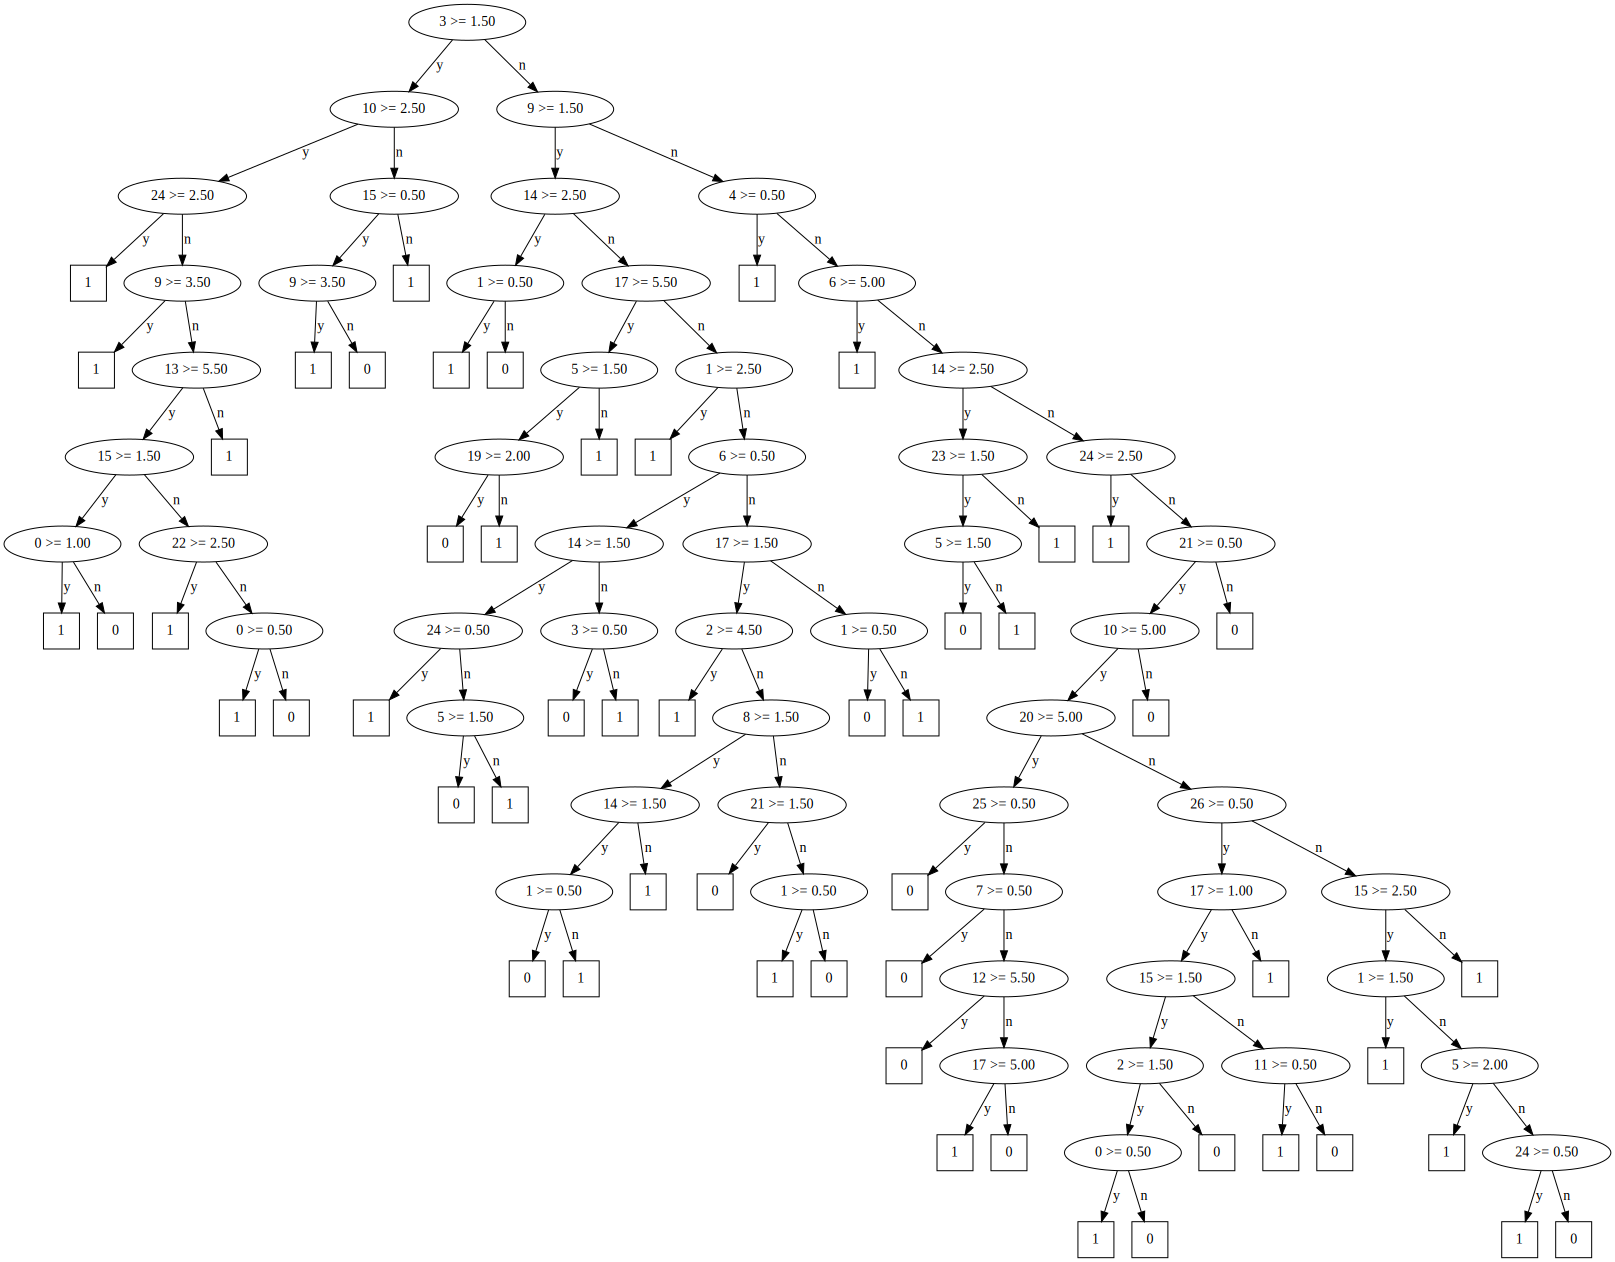

In [9]:
tree, tree_g, sensitivity, specificity, accuracy, uar = get_dtree_model_validate(features=None)
tree_g